# Regresión Lineal Simple

### Importing Needed packages

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
# %matplotlib inline

# Fuente de datos: 
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

Archivo: "FuelConsumptionCo2.csv" ubicado en: https://github.com/JoseRaulCastro/EBAC/blob/main/FuelConsumptionCo2.xlsx

In [59]:
import os
os.chdir("/Users/Raul/Desktop")


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [60]:
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [61]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


Lets select some features to explore more.

In [62]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,3.0,6,11.0,256
7,3.0,6,11.2,261
8,2.0,4,8.7,205


we can plot each of these features:

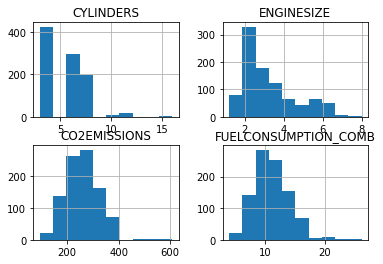

In [63]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

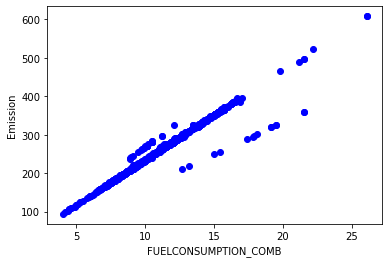

In [64]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

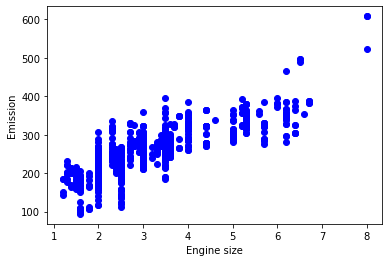

In [65]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
plot __CYLINDER__ vs the Emission, to see how linear is their relation:

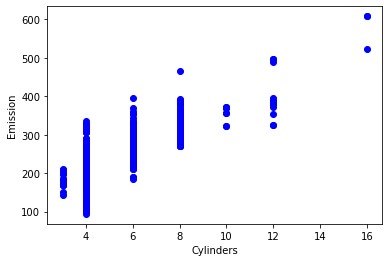

In [66]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [67]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

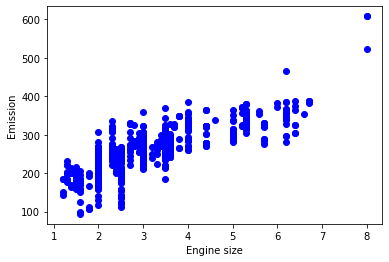

In [68]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [69]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.03360363]]
Intercept:  [137.3574081]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

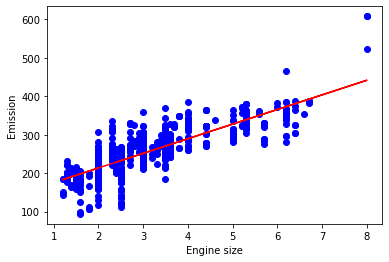

In [70]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [71]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 28.17
Residual sum of squares (MSE): 1426.17
R2-score: 0.50


# Parte 2

# Multiple Regression Model

In [72]:
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [73]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,2.0,4,11.0,8.6,9.9,232
3,2.0,4,11.3,9.1,10.3,242
4,2.0,4,11.2,8.0,9.8,230
5,2.0,4,11.3,8.1,9.8,231
6,3.0,6,12.3,9.4,11.0,256
7,3.0,6,12.3,9.8,11.2,261
8,2.0,4,10.0,7.2,8.7,205


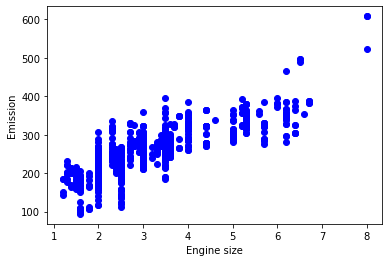

In [74]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

In [75]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,

In [76]:
train = cdf[msk]
test = cdf[~msk]

Train data distribution

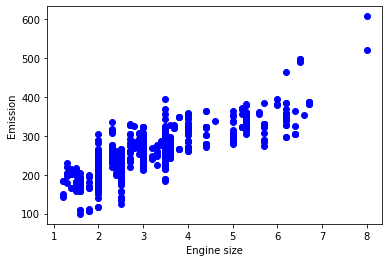

In [77]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [94]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.76231395  2.76991559 20.15884239]]


As mentioned before, Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

# Prediction

In [95]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

C:\Users\Raul\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [96]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, y )

Mean absolute error: 7.81
Residual sum of squares (MSE): 342.47
R2-score: 0.93


# Practica
Try to use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [97]:
# write your code here
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.67811009  2.86016631 10.88175493  9.38216605]]


In [98]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

C:\Users\Raul\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [99]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y) )

Mean absolute error: 7.83
Residual sum of squares (MSE): 342.49
R2-score: 0.93


# Parte 3

# Modelos de regresión adicionales al lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def pol_grado1(x, Beta_0, Beta_1):
     y = Beta_0 + Beta_1*x 
     return y

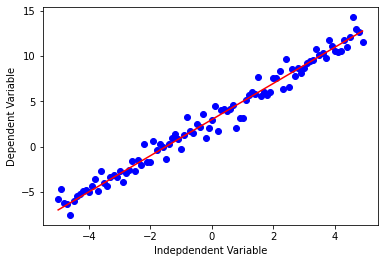

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado1(x, 3, 2)
y_noise = np.random.normal(0, 1, size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [32]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(pol_grado1, x, ydata)

In [33]:
#print the final parameters
print("beta_0 = ", popt[0], "beta_1 = ", popt[1])

beta_0 =  3.0361230734407156 beta_1 =  1.9618533789546913


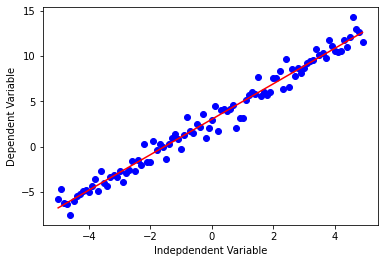

In [34]:
y_ajust = pol_grado1(x, popt[0], popt[1])
plt.plot(x, ydata,  'bo')
plt.plot(x, y_ajust, 'r') 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.show()

In [45]:
# Modelo polinomial
def pol_grado3(x, Beta_0, Beta_1, Beta_2, Beta_3):
     y = Beta_0 + Beta_1*x + Beta_2*(x**2) + Beta_3*(x**3)
     return y

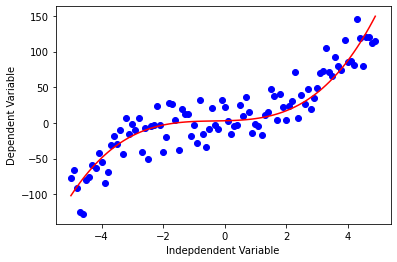

In [37]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado3(x, 3, 1, 1, 1)
y_noise = 20 * np.random.normal(0,1,size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [50]:
# Ajuste del modelo mediante mínimos cuadrados 
# split data into train/test
msk = np.random.rand(len(x)) <= 0.8
msk

array([ True,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [51]:
train_x = x[msk]
test_x = x[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [52]:
# build the model using train set
from scipy.optimize import curve_fit
popt, pcov = curve_fit(pol_grado3, train_x, train_y)

In [54]:
#print the estimated parameters
print("beta_0 = ", popt[0], "beta_1 = ", popt[1], "beta_2 = ", popt[2], "beta_3 = ", popt[3])

beta_0 =  2.71452790751139 beta_1 =  6.658489796763909 beta_2 =  1.0189408790377463 beta_3 =  0.6881719126254783


In [55]:
# predict using test set
y_hat = pol_grado3(test_x, *popt)

In [56]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 21.04
Residual sum of squares (MSE): 635.64
R2-score: 0.62


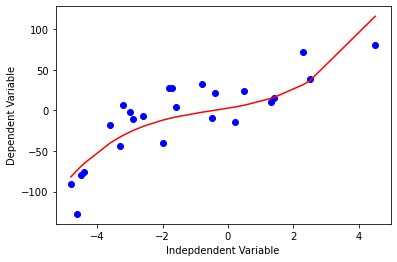

In [57]:
plt.plot(test_x, test_y,  'bo')
plt.plot(test_x, y_hat, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

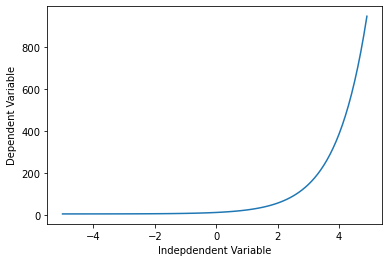

In [43]:
# Modelo exponencial
# Y = a +b*exp(X)

X = np.arange(-5.0, 5.0, 0.1)
Y = 5 + 7 * np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\Raul\AppData\Local\Temp/ipykernel_3936/4036793520.py:4: RuntimeWarning: invalid value encountered in log
  Y = 2 + 6* np.log(X)


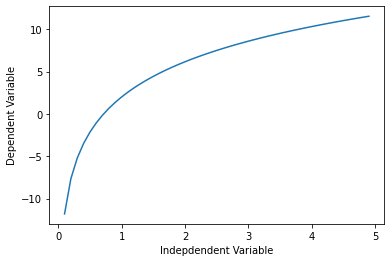

In [47]:
# Modelo logarítmico

X = np.arange(-5.0, 5.0, 0.1)
Y = 2 + 6 * np.log(X)
plt.plot(X,Y) 
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.show()

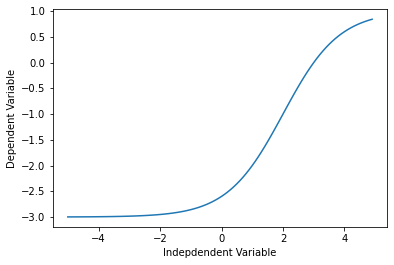

In [48]:
# Modelo Sigmoidal o Logístico
# Y = a + (b / (1 + c ** (X -d)))

X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Variable Y')
plt.xlabel('Variable X')
plt.show()

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [101]:
df = pd.read_excel("Mexico GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
